# Loading Libraries , packages and modules for project

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing.imputation import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.cross_validation import KFold

# Loading Data file (titanic data)

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Data exploration

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis (EDA)

## Data Distributions 

In [10]:
#Target column is Survived (1) or not survived (0)
df['Survived'].unique() # finding the number of classes


array([0, 1], dtype=int64)

In [11]:
print (df['Survived'].value_counts())
print ('*****************', '\n')
#Percentage ratios of classes or class balance check
print ('the percentage of survived passangers: ',round(df['Survived'].value_counts()[1]/len(df), 2)*100, '%')
print ('the percentage of non-survived passangers: ',round(df['Survived'].value_counts()[0]/len(df), 2)*100, '%')

0    549
1    342
Name: Survived, dtype: int64
***************** 

the percentage of survived passangers:  38.0 %
the percentage of non-survived passangers:  62.0 %


In [12]:
print (df['Sex'].value_counts())
print ('\n','*****************', '\n')
#Percentage ratios of classes or class balance check
print ('the percentage of male passangers: ',round(df['Sex'].value_counts()[0]/len(df), 2)*100, '%')
print ('the percentage of female passangers: ',round(df['Sex'].value_counts()[1]/len(df), 2)*100, '%')

male      577
female    314
Name: Sex, dtype: int64

 ***************** 

the percentage of male passangers:  65.0 %
the percentage of female passangers:  35.0 %


In [13]:
print (df['SibSp'].value_counts())
print ('\n','*****************', '\n')
#Percentage ratios of classes or class balance check
print ('the percentage of 0 siblings passangers: ',round(df['SibSp'].value_counts()[0]/len(df), 2)*100, '%')
print ('the percentage of 1 siblings passangers: ',round(df['SibSp'].value_counts()[1]/len(df), 2)*100, '%')
print ('the percentage of 2 siblings passangers: ',round(df['SibSp'].value_counts()[2]/len(df), 2)*100, '%')
print ('the percentage of 3 siblings passangers: ',round(df['SibSp'].value_counts()[4]/len(df), 2)*100, '%')
print ('the percentage of 4 siblings passangers: ',round(df['SibSp'].value_counts()[3]/len(df), 2)*100, '%')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

 ***************** 

the percentage of 0 siblings passangers:  68.0 %
the percentage of 1 siblings passangers:  23.0 %
the percentage of 2 siblings passangers:  3.0 %
the percentage of 3 siblings passangers:  2.0 %
the percentage of 4 siblings passangers:  2.0 %


In [14]:
print (df['Embarked'].value_counts())
print ('\n','*****************', '\n')
#Percentage ratios of classes or class balance check
print ('the percentage of S Embarked passangers: ',round(df['Embarked'].value_counts()[0]/len(df), 2)*100, '%')
print ('the percentage of C Embarked passangers: ',round(df['Embarked'].value_counts()[1]/len(df), 2)*100, '%')
print ('the percentage of Q Embarked passangers: ',round(df['Embarked'].value_counts()[2]/len(df), 2)*100, '%')

S    644
C    168
Q     77
Name: Embarked, dtype: int64

 ***************** 

the percentage of S Embarked passangers:  72.0 %
the percentage of C Embarked passangers:  19.0 %
the percentage of Q Embarked passangers:  9.0 %


Text(3.799999999999997, 0.5, 'number of passangers')

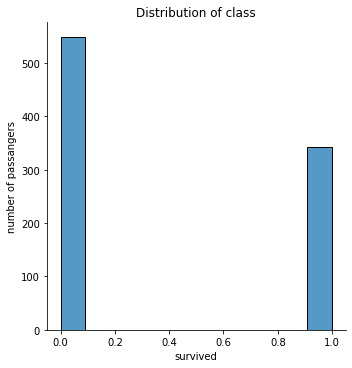

In [15]:
# distribution map
sns.displot(df['Survived'])
plt.title('Distribution of class')
plt.xlabel('survived')
plt.ylabel('number of passangers')

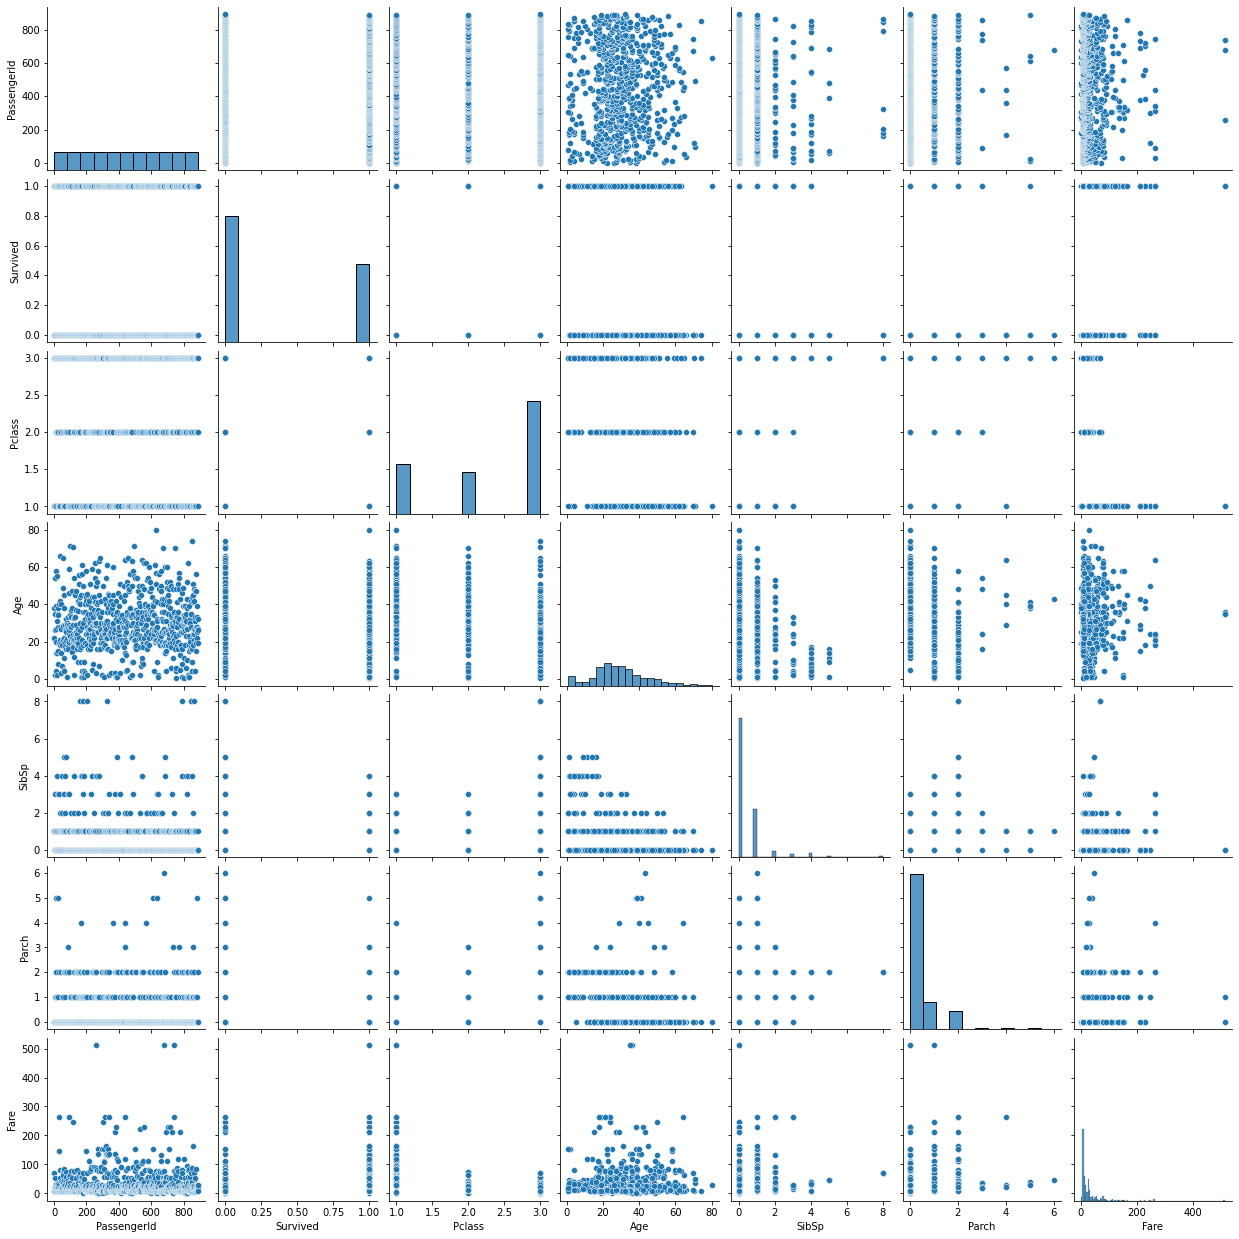

In [16]:
sns.pairplot(data = df)

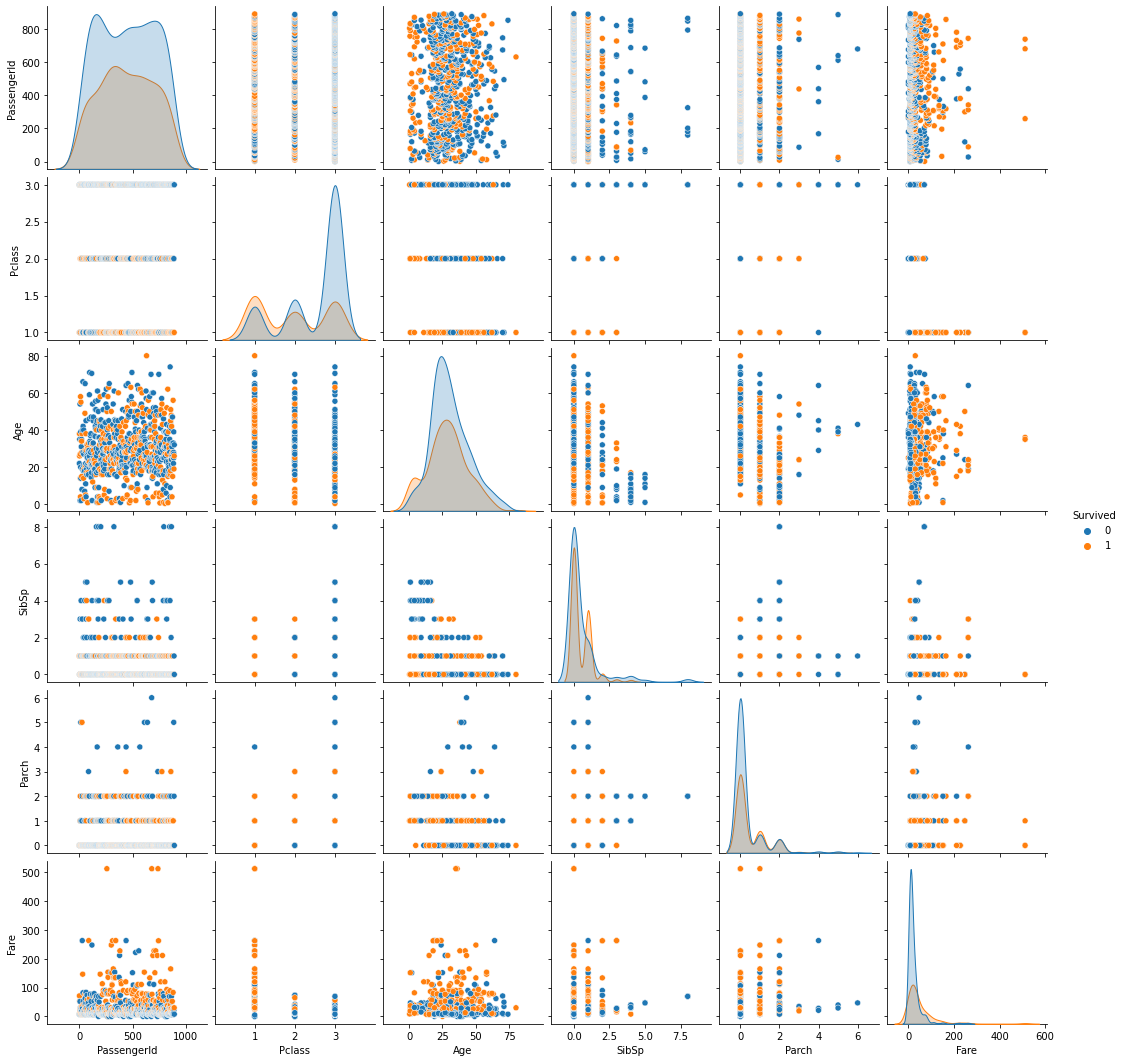

In [17]:
sns.pairplot(data = df, hue='Survived')

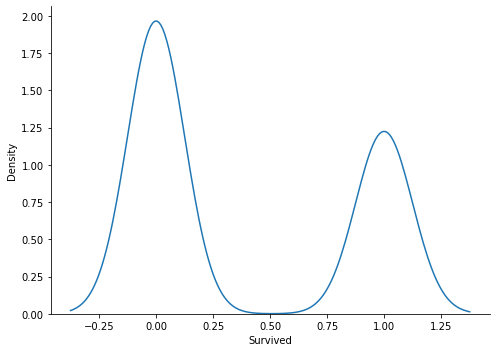

In [18]:
sns.displot(data=df, x="Survived", kind='kde', height=5, aspect=1.4)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

 ***************** 



Text(0.5, 1.0, 'Distribution chart of Embarked passageners')

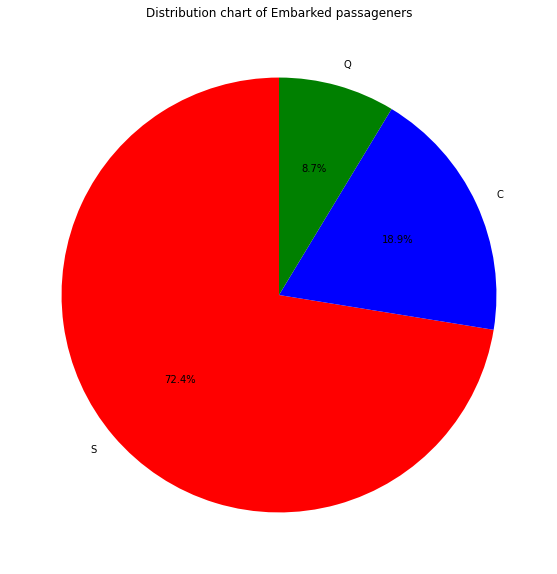

In [19]:
#Embarked column Pie Chart
print (df['Embarked'].value_counts())
print ('\n','*****************', '\n')
embarked = [df['Embarked'].value_counts()['S'], df['Embarked'].value_counts()['C'], df['Embarked'].value_counts()['Q']]
embarked_labels =['S', 'C', 'Q']
colors = ['red', 'blue', 'green']
plt.figure(1, figsize = (15 ,10))
plt.pie(embarked, labels=embarked_labels,colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution chart of Embarked passageners')

<AxesSubplot:xlabel='Age', ylabel='Density'>

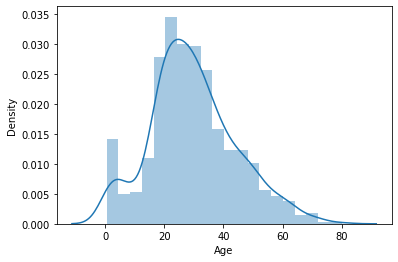

In [20]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

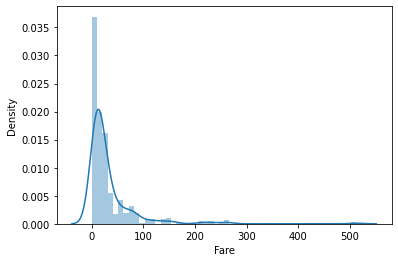

In [21]:
sns.distplot(df['Fare'])

In [22]:
#Dropping the columns (Name, Ticket, Cabin)

# Missing Values

In [23]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Manipulation of missing values


In [24]:
print ('mean value of Age', round(df['Age'].mean(), 2))
print ('median value of Age', round(df['Age'].median(), 2))
print ('mode value of Age', round(df['Age'].mode(), 2))
#Data patterns suggesting data has normally distributed. 

mean value of Age 29.7
median value of Age 28.0
mode value of Age 0    24.0
dtype: float64


In [25]:
print ('Percentage of missing values in Cabin column',round(df['Cabin'].isnull().sum()/len(df)*100, 2), '%')

Percentage of missing values in Cabin column 77.1 %


In [26]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace =True)

In [27]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean(), 2)) 

In [28]:
df['Embarked'].mode()

0    S
dtype: object

In [29]:
df['Embarked'] = df['Embarked'].fillna('S') 

In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Outliers Identification and Treatment

In [46]:
def outlier_iqr(input_data):
    q1=input_data.quantile(0.25)
    q3=input_data.quantile(0.75)
    iqr = q3-q1
    lower_whisker = q1-(1.5*iqr)
    upper_whisker = q3+(1.5*iqr)
    outlier_list = []
    for i in input_data:
        if i>upper_whisker or i<lower_whisker:
            outlier_list.append(i)
    print ('outliers are', outlier_list)
    print ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)
    return ('lower_whisker value :', lower_whisker, 'upper_whisker value', upper_whisker)

In [48]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [51]:
#Quantifying Outliers
cols=['Pclass', 'Age', 'SibSp', 'Parch','Fare']
for i in cols:
    print('*****',i)
    outlier_iqr(df[i])
    print('*****')

***** Pclass
outliers are []
lower_whisker value : 0.5 upper_whisker value 4.5
*****
***** Age
outliers are [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]
lower_whisker value : 2.5 upper_whisker value 54.5
*****
***** SibSp
outliers are [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]
lower_whisker value : -1.5 upper_whisker value 2.5
*****
***** Parch
outliers are [1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1

In [53]:
#Infereance: 
#There are several outliers in fare and age , however age and fare are very important in deciding the survivality. So, here no imputation done. 

# Feature Engineering

In [63]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033206,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069811,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331334,0.083081,0.018443,-0.549500
Age,0.033206,-0.069811,-0.331334,1.000000,-0.232624,-0.179194,0.091563
SibSp,-0.057527,-0.035322,0.083081,-0.232624,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179194,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091563,0.159651,0.216225,1.000000


In [64]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069811
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

<AxesSubplot:>

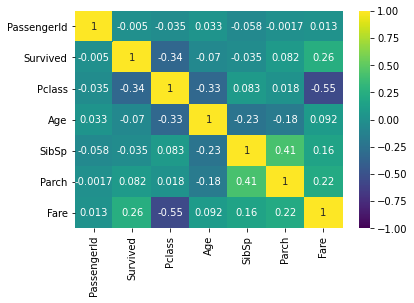

In [66]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap='viridis')

# Data Preparation

## Encoding the lables

In [41]:
#One Hot encoding through dummies method in Pandas
X=df.copy()
X.drop(['Survived','PassengerId'], axis=1, inplace =True)


In [57]:
X=pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [58]:
Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Data Splitting 

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=200) 
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
411,3,29.7,0,0,6.8583,0,1,0,1,0
721,3,17.0,1,0,7.0542,0,1,0,0,1
165,3,9.0,0,2,20.5250,0,1,0,0,1
329,1,16.0,0,1,57.9792,1,0,1,0,0
289,3,22.0,0,0,7.7500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
810,3,26.0,0,0,7.8875,0,1,0,0,1
836,3,21.0,0,0,8.6625,0,1,0,0,1
784,3,25.0,0,0,7.0500,0,1,0,0,1
617,3,26.0,1,0,16.1000,1,0,0,0,1


## Data Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler(with_mean=True, with_std=True)
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.804093,0.016606,-0.483147,-0.472165,-0.535127,-0.733346,0.733346,-0.465933,3.154972,-1.645701
1,0.804093,-0.941462,0.488606,-0.472165,-0.530818,-0.733346,0.733346,-0.465933,-0.316960,0.607644
2,0.804093,-1.544970,-0.483147,1.999759,-0.234520,-0.733346,0.733346,-0.465933,-0.316960,0.607644
3,-1.606494,-1.016901,-0.483147,0.763797,0.589307,1.363612,-1.363612,2.146229,-0.316960,-1.645701
4,0.804093,-0.564270,-0.483147,-0.472165,-0.515513,1.363612,-1.363612,-0.465933,3.154972,-1.645701


# Classification Models

## Support Vector Machine (SVC)

In [68]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf', gamma='auto', probability=False)
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)
df1_svc = pd.DataFrame({'real_value':y_test, 'svc_predict':svc_pred})
print (svc_pred)
df1_svc

[0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]


,real_value,svc_predict
659,0,0
525,0,0
828,1,0
753,0,0
518,1,1
...,...,...
650,0,0
484,1,0
383,1,1
57,0,0


In [76]:
print ('confusion matrix', confusion_matrix(y_test, svc_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, svc_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, svc_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, svc_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, svc_pred)*100, 2), '%')

confusion matrix [[97  7]
 [33 42]]
*****************************
accuracy score 77.65 %
*****************************
precision score 85.71 %
*****************************
recall score 56.0 %
*****************************
f1- score 67.74 %


# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression(fit_intercept=True)
LR_model.fit(x_train, y_train)
LR_pred = LR_model.predict(x_test)
df1_LR = pd.DataFrame({'real_value':y_test, 'svc_predict':LR_pred})
print (LR_pred)
df1_LR

[0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1
 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0]


,real_value,svc_predict
659,0,0
525,0,0
828,1,0
753,0,0
518,1,1
...,...,...
650,0,0
484,1,1
383,1,1
57,0,0


In [78]:
print ('confusion matrix', confusion_matrix(y_test, LR_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, LR_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, LR_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, LR_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, LR_pred)*100, 2), '%')

confusion matrix [[88 16]
 [24 51]]
*****************************
accuracy score 77.65 %
*****************************
precision score 76.12 %
*****************************
recall score 68.0 %
*****************************
f1- score 71.83 %


## Naive Bayes Algorithm

In [82]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(x_train, y_train)
NB_pred = NB_model.predict(x_test)
df1_NB = pd.DataFrame({'real_value':y_test, 'NB_predict':NB_pred})
print (NB_pred)
df1_NB

[1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0]


,real_value,NB_predict
659,0,1
525,0,0
828,1,0
753,0,0
518,1,1
...,...,...
650,0,0
484,1,1
383,1,1
57,0,0


In [81]:
print ('confusion matrix', confusion_matrix(y_test, NB_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, NB_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, NB_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, NB_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, NB_pred)*100, 2), '%')

confusion matrix [[88 16]
 [23 52]]
*****************************
accuracy score 78.21 %
*****************************
precision score 76.47 %
*****************************
recall score 69.33 %
*****************************
f1- score 72.73 %


## Decision Tree Classification

In [83]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier(criterion='gini', splitter='best', random_state=None)
DT_model.fit(x_train, y_train)
DT_pred = NB_model.predict(x_test)
df1_DT = pd.DataFrame({'real_value':y_test, 'DT_predict':DT_pred})
print (DT_pred)
df1_DT

[1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0]


,real_value,DT_predict
659,0,1
525,0,0
828,1,0
753,0,0
518,1,1
...,...,...
650,0,0
484,1,1
383,1,1
57,0,0


In [84]:
print ('confusion matrix', confusion_matrix(y_test, DT_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, DT_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, DT_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, DT_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, DT_pred)*100, 2), '%')

confusion matrix [[88 16]
 [23 52]]
*****************************
accuracy score 78.21 %
*****************************
precision score 76.47 %
*****************************
recall score 69.33 %
*****************************
f1- score 72.73 %


# Ensemble methods


### Bagging - Random Forest

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [86]:
rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,
                      base_estimator=DecisionTreeClassifier(criterion='gini'))
rf_model.fit(x_train,y_train) # fitting our bagging tree ensemble using fit method
print (rf_model.oob_score_*100)

81.03932584269663


In [87]:
list1=list(range(10, 300, 20))
list1

[10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290]

In [88]:
for w in range(10,300,20):
    rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                          base_estimator=DecisionTreeClassifier())
    rf_model.fit(x_train,y_train)
    oob=rf_model.oob_score_*100
    print ('For n_estimators = '+str(w))
    print ('OOB score is =' +str(oob))
    print ('************************')
    

For n_estimators = 10
OOB score is =82.30337078651685
************************
For n_estimators = 30
OOB score is =82.58426966292134
************************
For n_estimators = 50
OOB score is =83.42696629213484
************************
For n_estimators = 70
OOB score is =83.56741573033707
************************
For n_estimators = 90
OOB score is =83.42696629213484
************************
For n_estimators = 110
OOB score is =83.42696629213484
************************
For n_estimators = 130
OOB score is =83.56741573033707
************************
For n_estimators = 150
OOB score is =82.7247191011236
************************
For n_estimators = 170
OOB score is =83.00561797752809
************************
For n_estimators = 190
OOB score is =82.86516853932584
************************
For n_estimators = 210
OOB score is =83.00561797752809
************************
For n_estimators = 230
OOB score is =83.28651685393258
************************
For n_estimators = 250
OOB score is =82.724719

In [89]:
rf_model=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=170,random_state=400,
                      base_estimator=DecisionTreeClassifier())
rf_model.fit(x_train,y_train) # fitting bagged tree classifier  model 

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=170, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [90]:
imp=[]
for i in rf_model.estimators_:
    imp.append(i.feature_importances_)
print (imp)


[array([0.10900076, 0.21931119, 0.07845596, 0.03815903, 0.23631727,
       0.        , 0.29315503, 0.00350227, 0.        , 0.02209849]), array([0.11661916, 0.22638147, 0.04423347, 0.03614822, 0.15878037,
       0.        , 0.34883387, 0.01106762, 0.00823469, 0.04970113]), array([0.13391419, 0.29293794, 0.05675043, 0.0124148 , 0.26085633,
       0.2157521 , 0.        , 0.00734973, 0.        , 0.02002448]), array([0.07810074, 0.20761212, 0.05521325, 0.01701279, 0.3204151 ,
       0.27470884, 0.        , 0.00294295, 0.00606832, 0.0379259 ]), array([0.11887935, 0.24714372, 0.05238751, 0.01599451, 0.22147286,
       0.30859157, 0.        , 0.00388451, 0.02087445, 0.01077152]), array([0.15184975, 0.20453356, 0.06366755, 0.03934807, 0.2061918 ,
       0.        , 0.30185418, 0.0212782 , 0.00566784, 0.00560904]), array([0.10574556, 0.26482277, 0.03289051, 0.02959218, 0.24630937,
       0.        , 0.29976657, 0.01069051, 0.0051762 , 0.00500634]), array([0.15303655, 0.23066209, 0.04307224, 0.05

In [91]:
imp=np.mean(imp,axis=0)
imp

array([0.10450986, 0.24339775, 0.0540511 , 0.02204471, 0.22902642,
       0.16115492, 0.15060739, 0.01054759, 0.00546832, 0.01919194])

In [98]:
#converting summarised feature importance measures into series object.
feature_importance=pd.Series(imp,index=X.columns.tolist())
feature_importance

Pclass        0.104510
Age           0.243398
SibSp         0.054051
Parch         0.022045
Fare          0.229026
Sex_female    0.161155
Sex_male      0.150607
Embarked_C    0.010548
Embarked_Q    0.005468
Embarked_S    0.019192
dtype: float64

In [100]:
#prediction
rf_pred = rf_model.predict(x_test)
df1_rf = pd.DataFrame({'real_value':y_test, 'rf_predict':rf_pred})
print (rf_pred)
df1_rf

[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0]


,real_value,rf_predict
659,0,0
525,0,0
828,1,0
753,0,0
518,1,1
...,...,...
650,0,0
484,1,0
383,1,1
57,0,0


In [101]:
print ('confusion matrix', confusion_matrix(y_test, rf_pred))
print ('*****************************')
print ('accuracy score', round(accuracy_score(y_test, rf_pred)*100, 2), '%')
print ('*****************************')
print ('precision score', round(precision_score(y_test, rf_pred)*100, 2), '%')
print ('*****************************')
print ('recall score', round(recall_score(y_test, rf_pred)*100, 2), '%')
print ('*****************************')
print ('f1- score', round(f1_score(y_test, rf_pred)*100, 2), '%')

confusion matrix [[94 10]
 [33 42]]
*****************************
accuracy score 75.98 %
*****************************
precision score 80.77 %
*****************************
recall score 56.0 %
*****************************
f1- score 66.14 %
